# MULTICLASS CLASSIFICATION ANALYSIS

In this jupyter notebook we will fit several one vs all classifier models using different combinations of features to classify 3 classes of iris species. We will investigate the model performance by visualizing decision boundary using mesh plot.

**Add the directory of the m_learn package to the system path**

In [1]:
from config import *
append_path('../../')

**Import necessary packages and modules**

In [2]:
import pandas as pd
import numpy as np
from m_learn.logistic_regression import multiclass_classifier
from m_learn.utility.data_preprocessing import get_xy_data, polynomial_dataFrame,mesh_data
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. Load & preprocess data

**Load the iris data**

In [3]:
iris = datasets.load_iris()

**Store the data in a pandas dataframe**

In [4]:
features = iris.feature_names
data = pd.DataFrame(iris.data, columns=features)
data["encoded_labels"] = iris.target
data = data.sample(frac=1, random_state=1).reset_index(drop=True)

In [5]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),encoded_labels
0,5.8,4.0,1.2,0.2,0
1,5.1,2.5,3.0,1.1,1
2,6.6,3.0,4.4,1.4,1
3,5.4,3.9,1.3,0.4,0
4,7.9,3.8,6.4,2.0,2
5,6.3,3.3,4.7,1.6,1
6,6.9,3.1,5.1,2.3,2
7,5.1,3.8,1.9,0.4,0
8,4.7,3.2,1.6,0.2,0
9,6.9,3.2,5.7,2.3,2


**Create string column for the labels**

In [6]:
output = "labels"
data[output] = data["encoded_labels"].replace([0,1,2], iris.target_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),encoded_labels,labels
0,5.8,4.0,1.2,0.2,0,setosa
1,5.1,2.5,3.0,1.1,1,versicolor
2,6.6,3.0,4.4,1.4,1,versicolor
3,5.4,3.9,1.3,0.4,0,setosa
4,7.9,3.8,6.4,2.0,2,virginica


**Train test split the data**

In [7]:
train_data, test_data = train_test_split(data, test_size = 0.266, random_state = 1)

## 2. Pair plot of different pairs of features

**Sepal Width against Sepal Length**

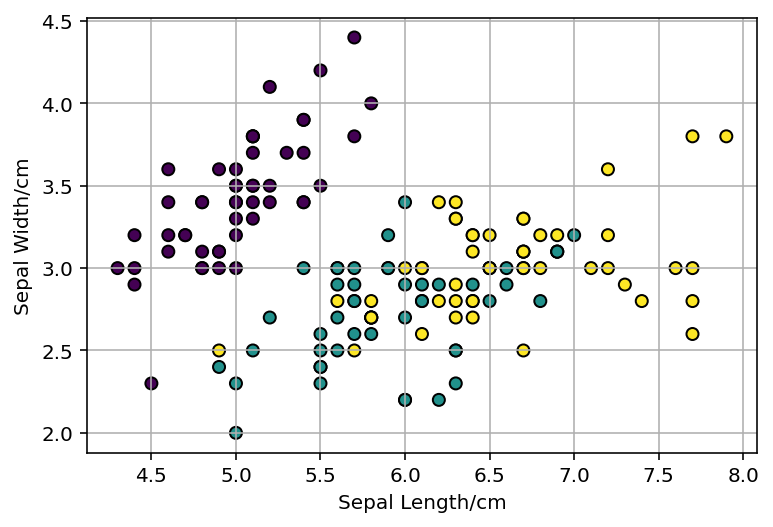

In [8]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c = data["encoded_labels"], edgecolors='k')
plt.xlabel("Sepal Length/cm")
plt.ylabel("Sepal Width/cm")
plt.grid()

**Petal Width against Petal Length**

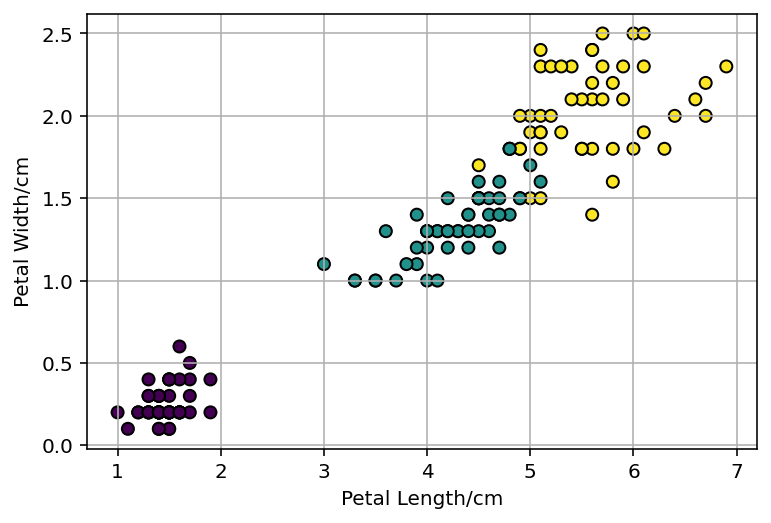

In [9]:
plt.scatter(data['petal length (cm)'], data['petal width (cm)'], c = data["encoded_labels"], edgecolors='k')
plt.xlabel("Petal Length/cm")
plt.ylabel("Petal Width/cm")
plt.grid()

**Petal Length against Sepal Width**

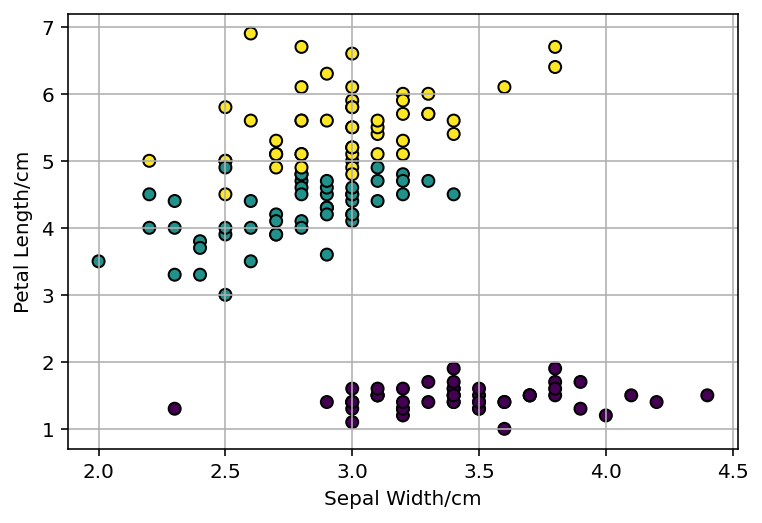

In [10]:
plt.scatter(data['sepal width (cm)'], data['petal length (cm)'], c = data["encoded_labels"], edgecolors='k')
plt.xlabel("Sepal Width/cm")
plt.ylabel("Petal Length/cm")
plt.grid()

**Sepal Length against Petal Width**

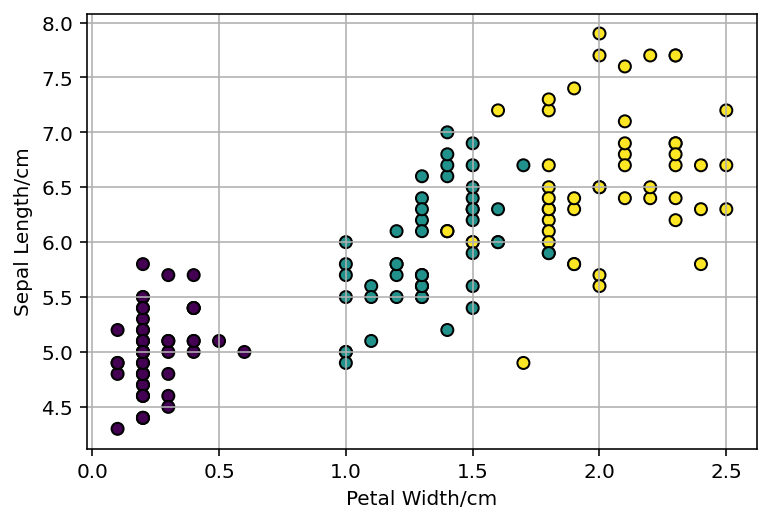

In [11]:
plt.scatter(data['petal width (cm)'], data['sepal length (cm)'], c = data["encoded_labels"], edgecolors='k')
plt.xlabel("Petal Width/cm")
plt.ylabel("Sepal Length/cm")
plt.grid()

**Pair plot with all the different combinations of features using seaborn library**

/home/ssl/anaconda3/envs/mfr_api/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


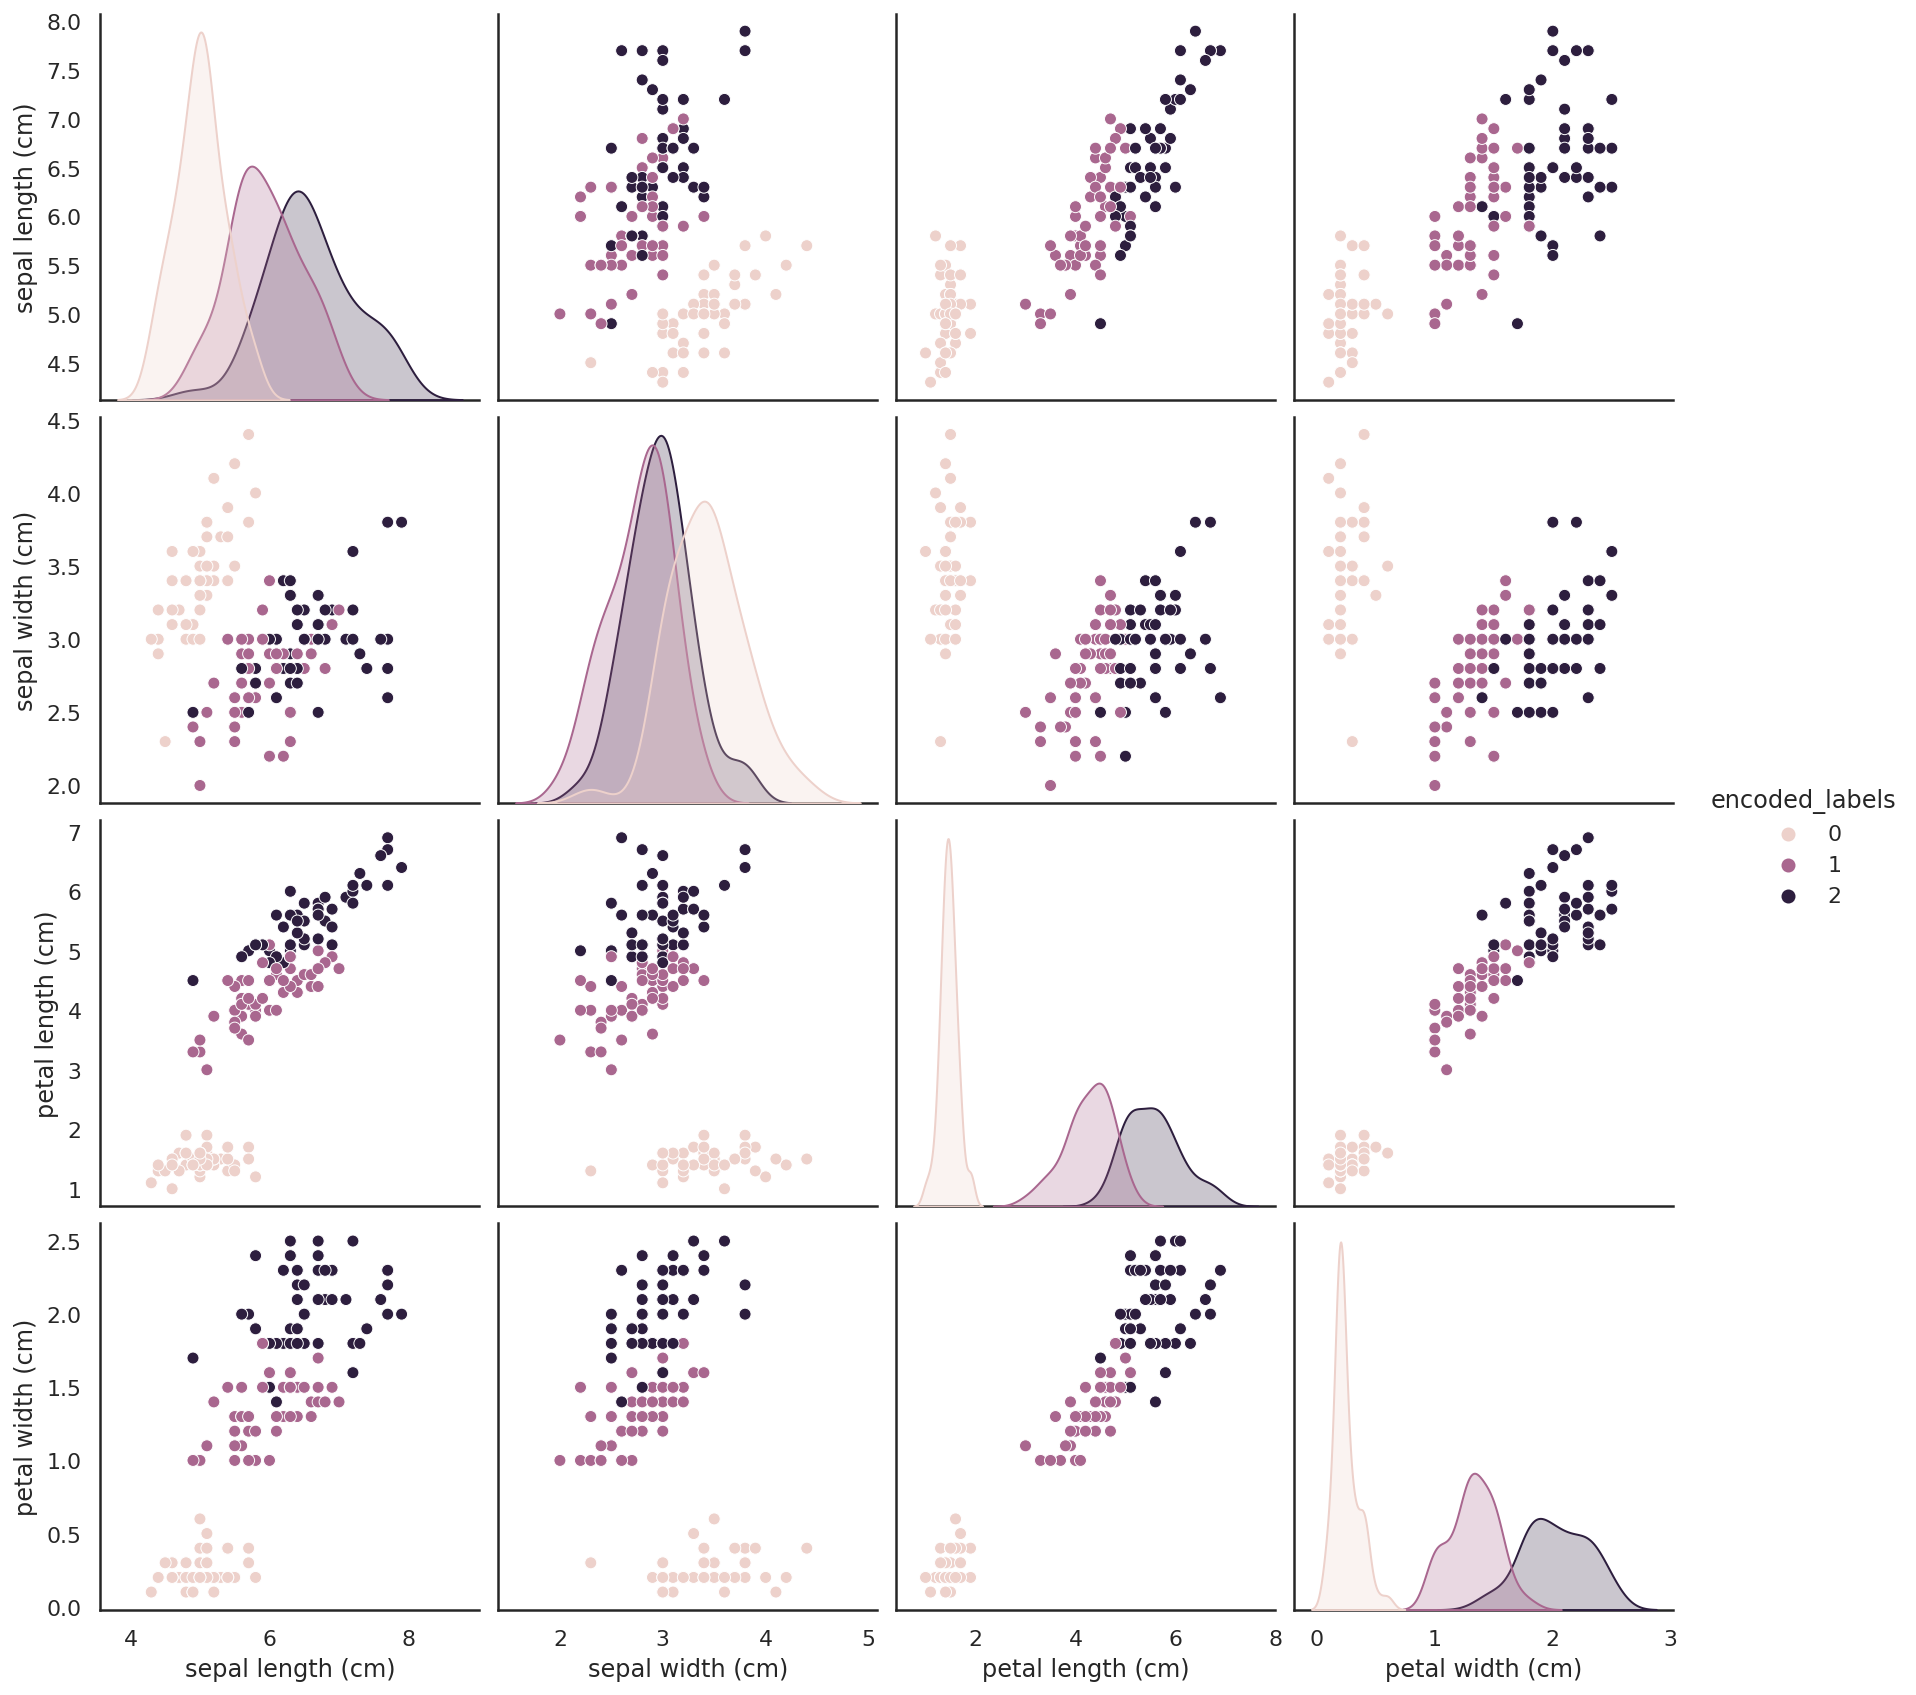

In [12]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.pairplot(data, hue='encoded_labels',vars = features, size=3)

## 3. Train and evaluate models having different set of features

### 3.1 Model 1 (sepal length & sepal width as features)

#### 3.1.1 Create and fit model

In [13]:
# Model parameters
step_size = 1e-3
maximum_iterations = 200000
# Features and output of the model
features = ['sepal length (cm)', 'sepal width (cm)']
output = 'encoded_labels'
# Create and fit the model
model1 = multiclass_classifier()
model1.fit(train_data, features, output, step_size, maximum_iterations = maximum_iterations)

#### 3.1.2 Visualize the decision boundary using mesh plot

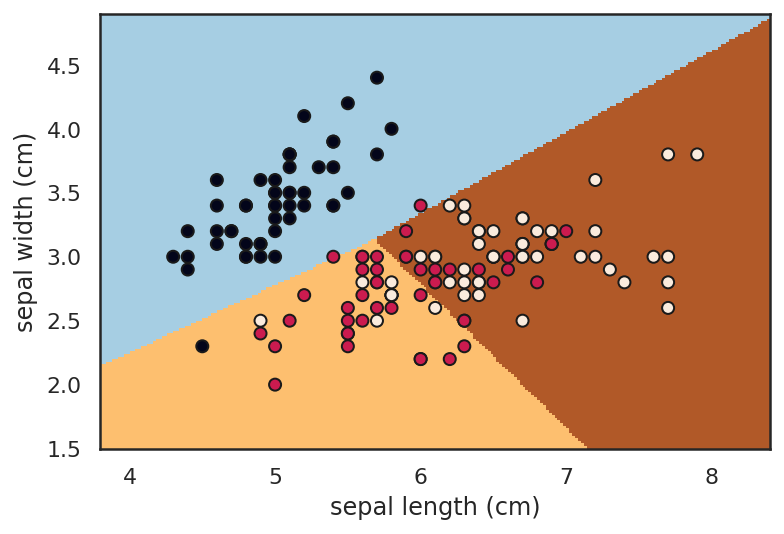

In [15]:
# step size in mesh plot
mesh_step = 0.02
# extract the xx & yy matrices and the unravelled mesh points
xx, yy, mesh_points = mesh_data(data, features, mesh_step = 0.02)
# compute predictions
predictions1 = model1.predict(mesh_points)
# convert the predictions into numpy array
predictions1 = np.array(predictions1)
# reshape the array so that it fits the mesh plot
predictions1 = predictions1.reshape(xx.shape)
# meshplot
plt.pcolormesh(xx, yy, predictions1, cmap=plt.cm.Paired)
# scatter plot of the 2 features
plt.scatter(data[features[0]].values, data[features[1]], c = data["encoded_labels"], edgecolors='k')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

Accuracy of the model

In [16]:
print("Accuracy of model1: ", model1.accuracy(test_data))

Accuracy of model1:  0.725


### 3.2 Model 2 (petal length & petal width as features)

#### 3.2.1 Create and fit model 

In [18]:
# Model parameters
step_size = 1e-3
maximum_iterations = 200000
# Features and output of the model
features = ['petal length (cm)', 'petal width (cm)']
output = 'encoded_labels'
# Create and fit the model
model2 = multiclass_classifier()
model2.fit(train_data, features, output, step_size, maximum_iterations = maximum_iterations)

#### 3.2.2 Visualize the decision Boundary using mesh plot

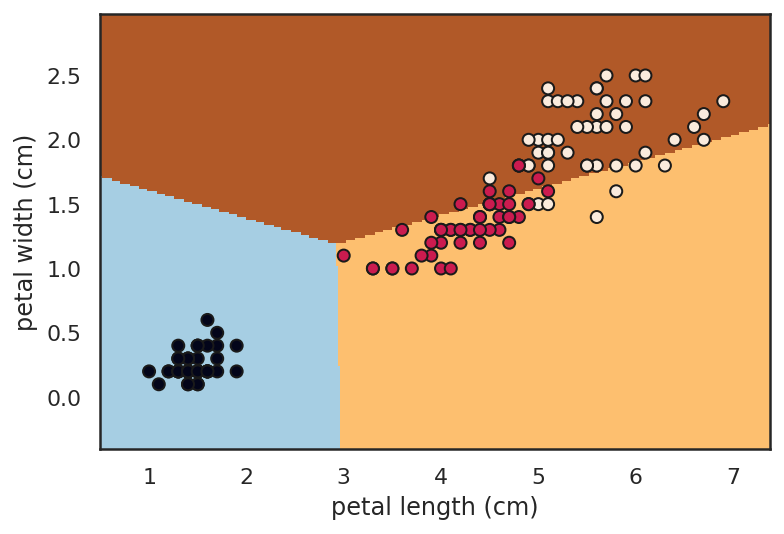

In [19]:
# step size in mesh plot
mesh_step = 0.02
# extract the xx & yy matrices and the unravelled mesh points
xx, yy, mesh_points = mesh_data(data, features, mesh_step = 0.02)
# compute predictions 
predictions2 = model2.predict(mesh_points)
# convert the predictions into numpy array
predictions2 = np.array(predictions2)
# reshape the array so that it fits the mesh plot
predictions2 = predictions2.reshape(xx.shape)
# mesh plot
plt.pcolormesh(xx, yy, predictions2, cmap=plt.cm.Paired)
# scatter plot of the 2 features
plt.scatter(data[features[0]].values, data[features[1]], c = data["encoded_labels"], edgecolors='k')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

Accuracy of the model

In [20]:
print("Accuracy of model2: ", model2.accuracy(test_data))

Accuracy of model2:  0.85


### 3.3 Model 3 (with all 4 features)

Features of the model

In [21]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Create and fit the model

In [22]:
model3 = multiclass_classifier()
model3.fit(train_data, features, output, step_size, maximum_iterations = maximum_iterations)

Accuracy of the model

In [23]:
print("Accuracy of model3: ", model3.accuracy(test_data))

Accuracy of model3:  0.95
